In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [1]:
import pandas as pd
import numpy as np
from tensorflow.keras.preprocessing.text import Tokenizer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [2]:
# Cargar el dataset
data = pd.read_csv('C:\\Users\\leand\\Documents\\LEANDRO\\UBA\\CEIA\\PROYECTO DE GRADO\\data\\dataset_wide.csv')
    
# Mostrar las primeras filas del dataset
print(data.head())

          P         D         L         R P_fuzzy_set  P_membership   
0  0.001536  0.019074  0.228509  0.344146          ok      0.996160  \
1  0.020376 -0.013247  0.221109  0.290854          ok      0.949059   
2  0.484156 -0.776060  0.041204  0.314878       cerca      0.859741   
3 -0.905154 -0.482209  0.927263 -0.502158   muy lejos      0.841923   
4  0.941052  0.694558 -0.346665 -0.119857   muy cerca      0.901753   

   D_fuzzy_set  D_membership               L_fuzzy_set  L_membership   
0   sin cambio      0.904630   despacito hacia delante      0.642544  \
1   sin cambio      0.933766   despacito hacia delante      0.605545   
2   alejandose      1.000000   muy lento hacia delante      0.706021   
3   alejandose      1.000000  muy rápido hacia delante      1.000000   
4  acercandose      1.000000     despacito hacia atrás      0.533348   

                      R_fuzzy_set  R_membership   
0         despacito hacia delante      0.779270  \
1         despacito hacia delante     

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9999 entries, 0 to 9998
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   P             9999 non-null   float64
 1   D             9999 non-null   float64
 2   L             9999 non-null   float64
 3   R             9999 non-null   float64
 4   P_fuzzy_set   9999 non-null   object 
 5   P_membership  9999 non-null   float64
 6   D_fuzzy_set   9999 non-null   object 
 7   D_membership  9999 non-null   float64
 8   L_fuzzy_set   9999 non-null   object 
 9   L_membership  9999 non-null   float64
 10  R_fuzzy_set   9999 non-null   object 
 11  R_membership  9999 non-null   float64
 12  FRASE         9999 non-null   object 
 13  CAT           9999 non-null   int64  
dtypes: float64(8), int64(1), object(5)
memory usage: 1.1+ MB


In [4]:
# Diccionarios para mapear valores únicos a valores numéricos
mapping_P_fuzzy_set = {value: index for index, value in enumerate(data['P_fuzzy_set'].unique())}
mapping_D_fuzzy_set = {value: index for index, value in enumerate(data['D_fuzzy_set'].unique())}
mapping_L_fuzzy_set = {value: index for index, value in enumerate(data['L_fuzzy_set'].unique())}
mapping_R_fuzzy_set = {value: index for index, value in enumerate(data['R_fuzzy_set'].unique())}

In [5]:
# Aplicar el label encoding manualmente a cada característica categórica
data['P_fuzzy_set_encoded']  = data['P_fuzzy_set'].map(mapping_P_fuzzy_set)
data['D_fuzzy_set_encoded'] = data['D_fuzzy_set'].map(mapping_D_fuzzy_set)
data['L_fuzzy_set_encoded'] = data['L_fuzzy_set'].map(mapping_L_fuzzy_set)
data['R_fuzzy_set_encoded'] = data['R_fuzzy_set'].map(mapping_R_fuzzy_set)

# Verificar los cambios
print(data.head())


          P         D         L         R P_fuzzy_set  P_membership   
0  0.001536  0.019074  0.228509  0.344146          ok      0.996160  \
1  0.020376 -0.013247  0.221109  0.290854          ok      0.949059   
2  0.484156 -0.776060  0.041204  0.314878       cerca      0.859741   
3 -0.905154 -0.482209  0.927263 -0.502158   muy lejos      0.841923   
4  0.941052  0.694558 -0.346665 -0.119857   muy cerca      0.901753   

   D_fuzzy_set  D_membership               L_fuzzy_set  L_membership   
0   sin cambio      0.904630   despacito hacia delante      0.642544  \
1   sin cambio      0.933766   despacito hacia delante      0.605545   
2   alejandose      1.000000   muy lento hacia delante      0.706021   
3   alejandose      1.000000  muy rápido hacia delante      1.000000   
4  acercandose      1.000000     despacito hacia atrás      0.533348   

                      R_fuzzy_set  R_membership   
0         despacito hacia delante      0.779270  \
1         despacito hacia delante     

In [6]:
data.columns

Index(['P', 'D', 'L', 'R', 'P_fuzzy_set', 'P_membership', 'D_fuzzy_set',
       'D_membership', 'L_fuzzy_set', 'L_membership', 'R_fuzzy_set',
       'R_membership', 'FRASE', 'CAT', 'P_fuzzy_set_encoded',
       'D_fuzzy_set_encoded', 'L_fuzzy_set_encoded', 'R_fuzzy_set_encoded'],
      dtype='object')

In [7]:
X = data[['P','D','L','R','CAT','P_fuzzy_set_encoded','D_fuzzy_set_encoded', 'L_fuzzy_set_encoded', 'R_fuzzy_set_encoded']]
y = data['FRASE']
z = data[['P_fuzzy_set', 'D_fuzzy_set', 'L_fuzzy_set', 'R_fuzzy_set']].apply(lambda x: ' '.join(x), axis=1)

In [8]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(y)
num_decoder_tokens = len(tokenizer.word_index) + 1

y = tokenizer.texts_to_sequences(y)
z = tokenizer.texts_to_sequences(z)

max_len = max(len(s) for s in y)

y = pad_sequences(y, maxlen=num_decoder_tokens, padding='post', truncating='post')
z = pad_sequences(z, maxlen=num_decoder_tokens, padding='post', truncating='post')

In [9]:
# Dividir los datos en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = X['CAT'], test_size=0.2, random_state=42)

# Dividir el conjunto de entrenamiento en conjunto de entrenamiento y validación
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=42)

# Obtener el índice de las filas de X_train, X_val y X_test
idx_train = X_train.index
idx_val = X_val.index
idx_test = X_test.index

In [10]:
# Dividir z en z_train, z_val y z_test
z_train = z[idx_train]
z_val = z[idx_val]
z_test = z[idx_test]

In [14]:
fuzzy_train = X_train[['P_fuzzy_set_encoded', 'D_fuzzy_set_encoded', 'L_fuzzy_set_encoded', 'R_fuzzy_set_encoded']].values
fuzzy_val = X_val[['P_fuzzy_set_encoded', 'D_fuzzy_set_encoded', 'L_fuzzy_set_encoded', 'R_fuzzy_set_encoded']].values
fuzzy_test = X_train[['P_fuzzy_set_encoded', 'D_fuzzy_set_encoded', 'L_fuzzy_set_encoded', 'R_fuzzy_set_encoded']].values

In [15]:
X_train = X_train[['P','D','L','R']].values
X_val = X_val[['P','D','L','R']].values
X_test = X_test[['P','D','L','R']].values

In [16]:
type(z_train),type(y_train),type(X_train),type(fuzzy_train
                                               )

(numpy.ndarray, numpy.ndarray, numpy.ndarray, numpy.ndarray)

In [ ]:
# Ajusta las columnas numéricas con StandardScaler
scaler_values = StandardScaler()
scaler_values.fit(X_train[['P','D','L','R']])

In [ ]:
X_train[['P','D','L','R']] = scaler_values.transform(X_train[['P','D','L','R']])
X_val[['P','D','L','R']] = scaler_values.transform(X_val[['P','D','L','R']])
X_test[['P','D','L','R']] = scaler_values.transform(X_test[['P','D','L','R']])

In [17]:
print('tamaño X train_scaled', X_train.shape)
print('tamaño y train', y_train.shape)
print('tamaño z train', z_train.shape)


print('tamaño X val_scaled', X_val.shape)
print('tamaño y val', y_val.shape)
print('tamaño z val_scaled', z_val.shape)

print('tamaño X test_scaled', X_test.shape)
print('tamaño y test', y_test.shape)
print('tamaño z test', z_test.shape)

tamaño X train_scaled (5999, 4)
tamaño y train (5999, 96)
tamaño z train (5999, 96)
tamaño X val_scaled (2000, 4)
tamaño y val (2000, 96)
tamaño z val_scaled (2000, 96)
tamaño X test_scaled (2000, 4)
tamaño y test (2000, 96)
tamaño z test (2000, 96)


In [95]:
import torch
from torch.utils.data import DataLoader, Dataset

# Definir los conjuntos de datos
class MyDataset(Dataset):
    def __init__(self, X, y, z, fuzzy):
        self.X = X
        self.y = y
        self.z = z
        self.fuzzy = fuzzy
    
    def __len__(self):
        return len(self.X)  # Devuelve el tamaño del conjunto de datos
    
    def __getitem__(self, index):
        # Obtener ejemplo y su longitud
        x = self.X[index]
        y = self.y[index]
        z = self.z[index]
        fuzzy = self.fuzzy[index]
        

        # Convertir a tensores de PyTorch y agregar dimensión adicional
        x = torch.tensor(x).float().unsqueeze(0)  # (1, 1, input_size)
        y = torch.tensor(y).long() # (1,)
        z = torch.tensor(z).long()  # (1,)
        fuzzy = torch.tensor(fuzzy).unsqueeze(0).long()

        return x, y, z, fuzzy


In [96]:
X_train.shape,y_train.shape,z_train.shape, fuzzy_train.shape

((5999, 4), (5999, 96), (5999, 96), (5999, 4))

In [97]:
train_ds = MyDataset(X_train, y_train, z_train, fuzzy_train)
valid_ds = MyDataset(X_val, y_val, z_val, fuzzy_val)
test_ds = MyDataset(X_test, y_test, z_test, fuzzy_test)

In [98]:
# Pytorch utiliza DataLoader para entregar los dataset de a batches
train_dataloader = DataLoader(train_ds, batch_size = 64)
valid_dataloader = DataLoader(valid_ds, batch_size=64)
test_dataloader = DataLoader(test_ds, batch_size=64)

In [107]:
import torch
import torch.nn as nn
import torch.optim as optim

# Definir dimensiones de entrada y salida
input_size = 4
hidden_size = 256
p_class = 5
d_class = 3
l_class = 11
r_class = 9

# Definir modelo

class seq2seqLSTM(nn.Module):
    
    def __init__(self, input_size, hidden_size, num_decoder_tokens, num_layers=4):
        super(seq2seqLSTM, self).__init__()

        self.p_embbeding = nn.Embedding(p_class, 5)
        self.d_embbeding = nn.Embedding(d_class, 5)
        self.l_embbeding = nn.Embedding(l_class, 5)
        self.r_embbeding = nn.Embedding(r_class, 5)
        self.encoder_lstm = nn.LSTM(input_size+20, hidden_size, num_layers, batch_first=True)
        self.decoder_embedding = nn.Embedding(num_decoder_tokens, 128)
        self.decoder_lstm = nn.LSTM(128, hidden_size, num_layers=4, batch_first=True)
        self.linear_layer = nn.Linear(hidden_size, num_decoder_tokens)

    def forward(self, inputs, labels, fuzzy):

        p_emb = self.p_embbeding(fuzzy[:,:,0])
        d_emb = self.d_embbeding(fuzzy[:,:,1])
        l_emb = self.l_embbeding(fuzzy[:,:,2])
        r_emb = self.r_embbeding(fuzzy[:,:,3])

        inputs_concat = torch.cat((inputs, p_emb, d_emb, l_emb, r_emb), dim=2)
        _, (state_h, state_c) = self.encoder_lstm(inputs_concat)

        embedding = self.decoder_embedding(labels)
        decoder_output, _ = self.decoder_lstm(embedding, (state_h, state_c))
        decoder_output = decoder_output.reshape(-1, decoder_output.shape[2])
        linear_output = self.linear_layer(decoder_output)

        # Remodela para que tenga el mismo número de pasos de tiempo que dec_inputs
        linear_output = linear_output.reshape(dec_inputs.shape[0], dec_inputs.shape[1], -1)
        return linear_output



model = seq2seqLSTM(input_size, hidden_size, num_decoder_tokens)
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device)
device

device(type='cpu')

In [108]:
model

seq2seqLSTM(
  (p_embbeding): Embedding(5, 5)
  (d_embbeding): Embedding(3, 5)
  (l_embbeding): Embedding(11, 5)
  (r_embbeding): Embedding(9, 5)
  (encoder_lstm): LSTM(24, 256, num_layers=4, batch_first=True)
  (decoder_embedding): Embedding(96, 128)
  (decoder_lstm): LSTM(128, 256, num_layers=4, batch_first=True)
  (linear_layer): Linear(in_features=256, out_features=96, bias=True)
)

In [109]:
import matplotlib.pyplot as plt

# Definir función de pérdida y optimizador
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)

# Inicializar listas para almacenar los valores de loss y accuracy
train_loss_list = []
val_loss_list = []
accuracy_list = []

# Entrenamiento
num_epochs = 150
for epoch in range(num_epochs):
    # Entrenamiento
    model.train()
    train_loss = 0
    for i, (inputs, labels, dec_inputs, fuzzy) in enumerate(train_dataloader):
        optimizer.zero_grad()
        outputs = model(inputs.to(device), dec_inputs.to(device), fuzzy.to(device))
        loss = criterion(outputs, labels.to(device))
        loss.backward()
        optimizer.step()
        train_loss += loss.item()
    train_loss /= len(train_dataloader)
    train_loss_list.append(train_loss)
    
    # Validación
    model.eval()
    val_loss = 0
    correct = 0
    total = 0
    with torch.no_grad():
        for i, (inputs, labels, dec_inputs, fuzzy) in enumerate(valid_dataloader):
            outputs = model(inputs.to(device), dec_inputs.to(device), fuzzy.to(device))
            loss = criterion(outputs, labels.to(device))
            val_loss += loss.item()
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0) * labels.size(1)
            correct += (predicted == labels).sum().item()
    val_loss /= len(valid_dataloader)
    val_loss_list.append(val_loss)
    accuracy = 100 * correct / total
    accuracy_list.append(accuracy)
    
    print(f'Epoch {epoch+1}/{num_epochs}, Train Loss: {train_loss:.4f}, Validation Loss: {val_loss:.4f}, Accuracy: {accuracy:.2f}%')

KeyboardInterrupt: 

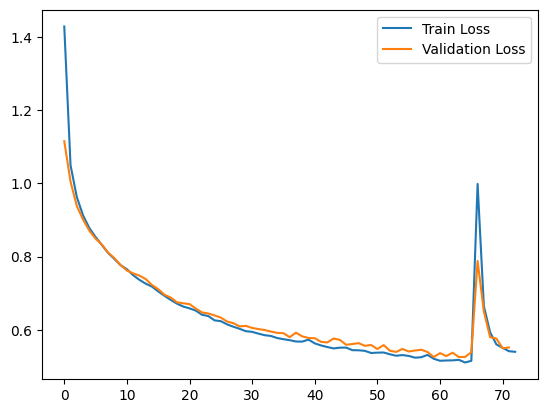

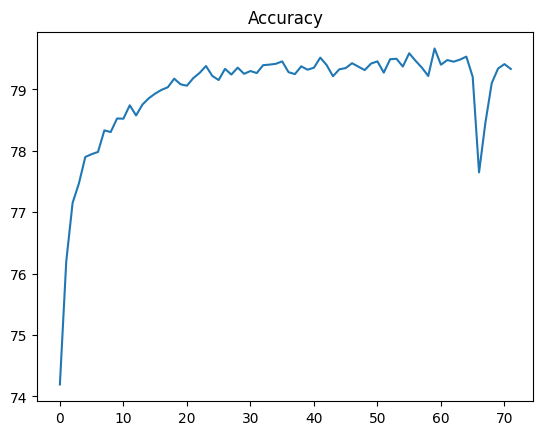

In [106]:
# Graficar loss y accuracy
plt.plot(train_loss_list, label='Train Loss')
plt.plot(val_loss_list, label='Validation Loss')
plt.legend()
plt.show()

plt.plot(accuracy_list)
plt.title('Accuracy')
plt.show()

In [ ]:
def predictions(preds):
    preds_words = []
    for i in range(preds.shape[0]):
        preds_row = preds[i]
        preds_row_words = []
        for idx in preds_row:
            if idx in tokenizer.index_word:
                preds_row_words.append(tokenizer.index_word[idx])
        preds_words.append(preds_row_words)

    return preds_words


In [ ]:
frasesnlg = predictions(predicted.numpy())
print(frasesnlg)

In [ ]:
def predict_eval(model,test_dataloader,criterion):
    model.eval()
    test_loss = 0
    correct = 0
    total = 0
    with torch.no_grad():
        for i, (inputs, labels, dec_inputs) in enumerate(test_dataloader):
            outputs = model(inputs, dec_inputs)
            loss = criterion(outputs, labels.long())
            test_loss += loss.item()
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0) * labels.size(1)
            correct += (predicted == labels).sum().item()
    test_loss /= len(test_dataloader)
    accuracy = 100 * correct / total

    print(f'Test Loss: {test_loss:.4f}, Accuracy: {accuracy:.2f}%')

    return predicted.numpy()

In [ ]:
preds = predict_eval(model,test_dataloader,criterion)

In [ ]:
frasestest = predictions(preds)
for i in range(len(frasestest)-1):
    print(frasestest[i])

In [ ]:
torch.save(model.state_dict(), 'C:\\Users\\leand\Documents\\LEANDRO\\UBA\\CEIA\\PROYECTO DE GRADO\\Modelos\\pytorch_lim_vocab\\seq2seqLSTM_model.pt')

In [ ]:
import json

# Obtén la configuración del tokenizer
tokenizer_config = tokenizer.to_json()

# Guarda la configuración en un archivo JSON
with open('C:\\Users\\leand\\Documents\\LEANDRO\\UBA\\CEIA\\PROYECTO DE GRADO\src\\tokenizer.json', 'w') as json_file:
    json_file.write(tokenizer_config)

In [ ]:
prueba_de = np.array([0.05123237,-0.99533163,0.5028787,-0.01450637])
target = np.array([36, 23, 4, 14, 15, 26, 4, 9, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [ ]:
model.eval()
test_in = torch.tensor(prueba_de.reshape(1,1,4)).float()
dec_test_in = torch.tensor(target).long().unsqueeze(0)

In [ ]:
test_in, dec_test_in

In [ ]:
X_test[2],z_test[2]

In [ ]:
test_in = torch.tensor(X_test[0].reshape(1,1,4)).float()
dec_test_in = torch.tensor(z_test[0]).long().unsqueeze(0)

In [ ]:
# Hacer predicciones con el modelo cargado
with torch.no_grad():
    prediction = model(test_in, dec_test_in)
    _, predicts = torch.max(prediction.data, 1)
    

# Imprimir las predicciones
print(predicts)

In [ ]:
predicciones_finales = predictions(dec_test_in.numpy())

In [ ]:
predicciones_finales

In [ ]:
tokenizer.word_index